In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor

In [2]:
QBtrain = pd.read_excel('QBBig.xlsx')
QBtrain.columns

Index(['Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts',

In [3]:
QBtrain.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,...,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000
mean,19.391546,30.360600,59.970106,221.651282,6.925337,1.379769,0.708172,85.559476,2.787295,11.563102,...,55.876895,6.228712,14.949896,114.732087,63.316978,239.347839,6.809086,10.748339,1.592874,88.612150
std,7.558592,11.208688,16.432031,88.556892,2.213155,0.800107,0.520376,26.219244,1.952944,12.218943,...,8.943406,1.328697,2.277122,140.097858,3.461191,24.354289,0.605889,0.752758,0.369068,9.238802
min,0.000000,0.000000,0.000000,-0.666667,-0.700000,0.000000,0.000000,0.000000,0.000000,-8.000000,...,34.800000,2.800000,9.800000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,17.500000,28.800000,59.528750,191.892857,6.502273,1.000000,0.333333,78.918750,1.428571,2.114583,...,50.000000,5.400000,13.300000,34.187500,60.600000,225.000000,6.400000,10.200000,1.312500,82.000000
50%,21.400000,33.250000,63.740000,244.366667,7.290000,1.400000,0.666667,90.736667,2.333333,7.666667,...,55.600000,6.200000,14.500000,35.812500,63.350000,238.132053,6.800000,10.700000,1.562500,89.000000
75%,24.081731,37.000000,67.240476,275.412338,7.932143,2.000000,1.000000,99.876500,3.750000,17.500000,...,60.000000,7.100000,16.575000,252.000000,64.900000,252.375000,7.200000,11.200000,1.875000,94.000000
max,39.000000,53.000000,100.000000,439.000000,22.000000,5.000000,4.000000,158.330000,14.000000,104.000000,...,88.900000,10.100000,22.300000,535.000000,74.700000,313.333333,8.900000,13.600000,2.812500,123.000000


In [4]:
QBtrain.head()

,Name,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
0,Joe Flacco,25.666667,41.166667,61.633333,267.500000,6.300000,1.333333,1.166667,77.760000,1.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
1,Jay Cutler,18.000000,36.000000,50.000000,225.000000,6.200000,1.000000,1.000000,67.480000,4.000000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
2,Andy Dalton,21.777778,32.888889,66.600000,269.222222,8.488889,2.000000,0.555556,107.934444,4.777778,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
3,Josh McCown,24.500000,36.666667,66.783333,281.000000,7.450000,1.333333,0.500000,93.173333,2.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
4,Matthew Stafford,26.500000,40.750000,65.300000,254.250000,6.425000,1.250000,1.250000,80.237500,1.500000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79


In [5]:
QBtrain.columns

Index(['Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts',

In [6]:
X_train = QBtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = QBtrain.Score


C:\Users\matt0\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


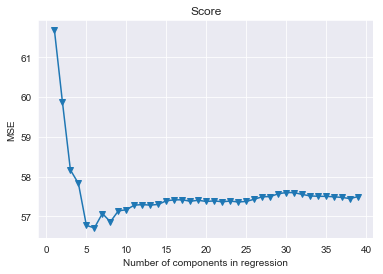

In [7]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 40):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 40), np.array(mse), '-v')
plt.xlabel('Number of components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [8]:
Offense = pd.read_excel('Input/Offense/Offense.xlsx')
Offense = Offense.set_index('Team')
Offense.head()

,PointsPerGame,Score,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,...,OpponentTacklesForLossPercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
SF,21.5,301,891,5099,5.7,307,168,37.5,43,41.9,...,26.2,8.7,22.2,461,62.0,3371,7.3,11.8,23,86
CHI,27.4,383,890,4845,5.4,294,175,39.4,48,64.6,...,19.1,6.2,11.9,457,65.9,3166,6.9,10.5,27,93
CIN,24.1,337,846,4567,5.4,280,167,38.9,42,71.4,...,24.0,5.7,11.3,499,61.3,3112,6.2,10.2,25,85
BUF,15.4,215,889,4108,4.6,246,192,31.8,32,56.2,...,21.8,8.5,19.7,432,54.2,2362,5.5,10.1,9,58
DEN,21.9,306,879,4932,5.6,282,179,33.0,40,57.5,...,19.2,6.0,16.8,503,62.2,3207,6.4,10.2,16,81


In [9]:
Offense['Played'] = Offense['Score'] / Offense['PointsPerGame']

In [10]:
Offense['OffensivePlays'] = Offense['OffensivePlays'] / Offense['Played']
Offense['OffensiveYards'] = Offense['OffensiveYards'] / Offense['Played']
Offense['FirstDowns'] = Offense['FirstDowns'] / Offense['Played']
Offense['ThirdDownAttempts'] = Offense['ThirdDownAttempts'] / Offense['Played']
Offense['RedZoneAttempts'] = Offense['RedZoneAttempts'] / Offense['Played']
Offense['PassingAttempts'] = Offense['PassingAttempts'] / Offense['Played']
Offense['PassingYards'] = Offense['PassingYards'] / Offense['Played']
Offense['PassingTouchdowns'] = Offense['PassingTouchdowns'] / Offense['Played']

In [11]:
QBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'TimesSackedPercentage', 'OpponentQuarterbackHitsPercentage']]

In [12]:
RBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'OpponentTacklesForLossPercentage']]

In [13]:
WROffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'PassingAttempts', 'CompletionPercentage', 'PassingYards', 'TeamPassingYardsPerAttempt', \
                    'PassingYardsPerCompletion', 'PassingTouchdowns', 'PasserRating']]

In [14]:
Def = pd.read_excel('Input/Defense/Def.xlsx')
Def['Opponent'] = Def['Team']
Def = Def.drop('Team', axis=1)
Def = Def.set_index('Opponent')
Def.head()

,OpponentPointsPerGame,OpponentScore,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating,OpponentRushingTouchdowns
Opponent,,,,,,,,,,,,,,,,,,,,,
SF,26.6,373,892,4844,5.4,289,189,38.1,50,64.0,...,6.6,16.6,484,62.4,3275,6.8,10.8,30,101,11
CHI,18.9,264,898,4352,4.8,251,194,34.5,36,52.8,...,7.6,15.1,544,61.6,3182,5.8,9.5,21,71,5
CIN,29.5,413,952,5782,6.1,331,196,50.5,52,67.3,...,6.2,14.2,501,65.9,3789,7.6,11.5,28,98,17
BUF,23.8,333,834,4091,4.9,256,179,38.0,44,72.7,...,6.7,17.0,435,64.6,2624,6.0,9.3,20,85,15
DEN,21.4,299,910,5293,5.8,285,187,39.0,39,56.4,...,7.8,16.6,499,64.1,3610,7.2,11.3,25,90,8


In [15]:
Def['Played'] = Def['OpponentScore'] / Def['OpponentPointsPerGame']

In [16]:
Def['OpponentOffensivePlays'] = Def['OpponentOffensivePlays'] / Def['Played']
Def['OpponentOffensiveYards'] = Def['OpponentOffensiveYards'] / Def['Played']
Def['OpponentFirstDowns'] = Def['OpponentFirstDowns'] / Def['Played']
Def['OpponentThirdDownAttempts'] = Def['OpponentThirdDownAttempts'] / Def['Played']
Def['OpponentRedZoneAttempts'] = Def['OpponentRedZoneAttempts'] / Def['Played']
Def['OpponentRushingYards'] = Def['OpponentRushingYards'] / Def['Played']
Def['OpponentPassingYards'] = Def['OpponentPassingYards'] / Def['Played']
Def['OpponentPassingTouchdowns'] = Def['OpponentPassingTouchdowns'] / Def['Played']
Def['OpponentRushingTouchdowns'] = Def['OpponentRushingTouchdowns'] / Def['Played']

In [17]:
QBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentTimesSackedPercentage', 'QuarterbackHitsPercentage', 'OpponentPassingAttempts', \
            'OpponentCompletionPercentage', 'OpponentPassingYards', 'OpponentPassingYardsPerAttempt', \
            'OpponentPassingYardsPerCompletion', 'OpponentPassingTouchdowns', 'OpponentPasserRating']]

In [18]:
RBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentRushingYards', 'OpponentRushingYardsPerAttempt', 'TacklesForLossPercentage', 'OpponentRushingTouchdowns']]

In [19]:
QB = pd.read_excel ('Input/Totals/QB.xlsx')
QBavg = pd.DataFrame()

QBavg['Name'] = QB['Name']
QBavg['Team'] = QB['Team']
QBavg['Rank'] = QB['Rank']
QBavg['CompletionsGame'] = QB['PassingCompletions'] / QB['Played']
QBavg['AttemptsGame'] = QB['PassingAttempts'] / QB['Played']
QBavg['PassingCompletionPercentage'] = QB['PassingCompletionPercentage']
QBavg['YardsGame'] = QB['PassingYards'] / QB['Played']
QBavg['PassingYardsPerAttempt'] = QB['PassingYardsPerAttempt']
QBavg['PassingTouchdownsGame'] = QB['PassingTouchdowns'] / QB['Played']
QBavg['InterceptionsGame'] = QB['PassingInterceptions'] / QB['Played']
QBavg['PassingRating'] = QB['PassingRating']
QBavg['RushingAttemptsGame'] = QB['RushingAttempts'] / QB['Played']
QBavg['RushingYardsGame'] = QB['RushingYards'] / QB['Played']
QBavg['RushingYardsPerAttempt'] = QB['RushingYardsPerAttempt']
QBavg['RushingTouchdownsGame'] = QB['RushingTouchdowns'] / QB['Played']
QBavg['PointsGame'] = QB['FantasyPointsPerGameDraftKings']

QBavg = QBavg.set_index('Name')
QBavg.head()


,Team,Rank,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,RushingYardsPerAttempt,RushingTouchdownsGame,PointsGame
Name,,,,,,,,,,,,,,,
Patrick Mahomes,KC,1,24.714286,36.857143,67.1,324.500000,8.8,3.214286,0.785714,114.83,3.928571,17.000000,4.3,0.142857,29.6
Matt Ryan,ATL,2,26.857143,38.428571,69.9,307.642857,8.0,2.142857,0.428571,107.62,2.000000,8.500000,4.2,0.214286,24.1
Ben Roethlisberger,PIT,3,27.714286,41.428571,66.9,318.714286,7.7,2.142857,1.071429,96.35,1.857143,6.500000,3.5,0.214286,24.0
Andrew Luck,IND,4,26.785714,39.785714,67.3,282.214286,7.1,2.428571,0.928571,98.37,2.642857,8.428571,3.2,0.000000,22.5
Jared Goff,LAR,5,23.571429,36.500000,64.6,305.214286,8.4,1.928571,0.857143,98.57,2.857143,7.285714,2.6,0.071429,22.1


In [20]:
QBRZ = pd.read_excel('Input/RZ/QBRZ.xlsx')

QBRZavg = pd.DataFrame()

QBRZavg['Name'] = QBRZ['Name']
QBRZavg['RZCompletionsGame'] = QBRZ['PassingCompletions'] / QBRZ['Played']
QBRZavg['RZAttemptsGame'] = QBRZ['PassingAttempts'] / QBRZ['Played']
QBRZavg['RZPassingCompletionPercentage'] = QBRZ['PassingCompletionPercentage']
QBRZavg['RZYardsGame'] = QBRZ['PassingYards'] / QBRZ['Played']
QBRZavg['RZPassingYardsPerAttempt'] = QBRZ['PassingYardsPerAttempt']
QBRZavg['RZPassingTouchdownsGame'] = QBRZ['PassingTouchdowns'] / QBRZ['Played']
QBRZavg['RZInterceptionsGame'] = QBRZ['PassingInterceptions'] / QBRZ['Played']
QBRZavg['RZPassingRating'] = QBRZ['PassingRating']
QBRZavg['RZRushingAttemptsGame'] = QBRZ['RushingAttempts'] / QBRZ['Played']
QBRZavg['RZRushingYardsGame'] = QBRZ['RushingYards'] / QBRZ['Played']
QBRZavg['RZRushingYardsPerAttempt'] = QBRZ['RushingYardsPerAttempt']
QBRZavg['RZRushingTouchdownsGame'] = QBRZ['RushingTouchdowns'] / QBRZ['Played']
QBRZavg['RZPointsGame'] = QBRZ['FantasyPointsPerGameDraftKings']

QBRZ = QBRZavg.set_index('Name')
QBRZ.head()

,RZCompletionsGame,RZAttemptsGame,RZPassingCompletionPercentage,RZYardsGame,RZPassingYardsPerAttempt,RZPassingTouchdownsGame,RZInterceptionsGame,RZPassingRating,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame
Name,,,,,,,,,,,,,
Patrick Mahomes,4.285714,6.571429,65.2,32.071429,4.9,2.357143,0.071429,111.82,0.928571,3.071429,3.3,0.142857,11.8
Andrew Luck,3.785714,6.000000,63.1,29.000000,4.8,2.000000,0.071429,109.42,0.214286,1.000000,4.7,0.000000,9.5
Drew Brees,4.357143,6.214286,70.1,25.785714,4.1,1.500000,0.000000,117.39,0.428571,0.928571,2.2,0.285714,9.0
Cam Newton,2.785714,4.071429,68.4,19.214286,4.7,1.357143,0.142857,103.73,1.142857,3.857143,3.4,0.285714,8.4
Matt Ryan,3.071429,4.785714,64.2,24.285714,5.1,1.428571,0.071429,110.07,0.357143,-0.428571,-1.2,0.214286,8.1


In [21]:
QBsnaps = pd.read_excel('Input/Totals/QBSnap.xlsx')
QBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Mike Glennon,ARI,QB,1,17,17.0,2.5,0.0,0.0,82.4,82.4,8.44,49.6
1,2,Josh Johnson,WAS,QB,2,97,48.5,74.6,16.5,0.0,58.8,58.8,40.24,41.5
2,3,Patrick Mahomes,KC,QB,14,932,66.6,100.0,5.9,0.0,61.3,61.3,414.52,44.5
3,4,Ryan Fitzpatrick,TB,QB,8,428,53.5,43.9,8.4,0.0,65.9,65.9,190.84,44.6
4,5,Matt Ryan,ATL,QB,14,923,65.9,98.7,3.0,0.0,61.3,61.3,337.18,36.5


In [22]:
QBsnaps = QBsnaps.drop(['Team', 'FantasyPointsDraftKings',  'Played', 'Position', 'Rank'], axis=1)
QBsnaps = QBsnaps.set_index('Name')

In [23]:
Defense = pd.read_excel('Input/Defense/Defense.xlsx')
QBDef = pd.DataFrame()
QBDef['Team'] = Defense['Team']
QBDef['DPointsAllowed'] = Defense['DraftKingsQuarterbackFantasyPointsAllowedAverage']
QBDef = QBDef.set_index('Team')
QBDef.head()

,DPointsAllowed
Team,
BAL,16.08
MIN,16.31
BUF,13.87
JAX,17.19
TEN,16.59


In [24]:
QBSalaries = pd.read_excel('Input/Salaries/QBSalaries.xlsx').dropna()
QBSalaries['DraftKingsSalary'] = QBSalaries['Salary']
QBSalaries['FantasyPointsDraftKings'] = QBSalaries['Projection']
QBSalaries = QBSalaries.drop(['Rk', 'Pos', 'WK', 'Opp Rank', \
'Opp Pos Rank', 'Salary', 'Projection'], axis=1)
QBSalaries = QBSalaries.set_index('OPP')
QBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
OPP,,,,
OAK,Patrick Mahomes,KC,7100.0,26.90
CIN,Ben Roethlisberger,PIT,7000.0,23.83
DET,Aaron Rodgers,GB,6300.0,20.73
TB,Matt Ryan,ATL,6300.0,20.55
SF,Jared Goff,LAR,6200.0,19.46


In [25]:
Vegas = pd.read_excel('Input/Vegas/vegas.xlsx')
Vegas['total'] = (Vegas['OverUnder'] - Vegas['PointSpread']) / 2
Vegas = Vegas.set_index('Team')
Vegas.head()

,Week,Home,PointSpread,OverUnder,total
Team,,,,,
GB,17,False,4.0,45.5,20.75
CHI,17,True,-4.0,45.5,24.75
ATL,17,False,4.0,47.5,21.75
MIN,17,True,-4.0,47.5,25.75
WAS,17,False,8.0,46.0,19.00


In [26]:
QBSalaries = QBSalaries.join(QBDef).join(QBDefense)
QBSalaries = QBSalaries.set_index('Team').join(Vegas).join(QBOffense)
QBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Josh Rosen,4400.0,10.48,18.25,20.9,59.479110,360.453425,6.1,20.685274,11.022603,...,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,8.9,19.9
ARI,Mike Glennon,4200.0,0.17,18.25,20.9,59.479110,360.453425,6.1,20.685274,11.022603,...,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,8.9,19.9
ATL,Matt Ryan,6300.0,20.55,22.70,28.8,62.316625,386.834739,6.2,22.368238,11.362779,...,63.214607,378.859551,6.0,22.046629,12.842697,45.6,3.139326,63.6,6.8,17.6
ATL,Matt Schaub,4500.0,0.07,22.70,28.8,62.316625,386.834739,6.2,22.368238,11.362779,...,63.214607,378.859551,6.0,22.046629,12.842697,45.6,3.139326,63.6,6.8,17.6
BAL,Lamar Jackson,5600.0,18.85,19.54,24.9,71.766379,401.834483,5.6,24.184483,13.523276,...,71.697361,370.293255,5.2,23.469795,14.597067,47.5,3.720821,61.5,5.0,11.2


In [27]:
QBSalaries = QBSalaries.set_index('Name')
QBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4400.0,10.48,18.25,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,8.9,19.9
Mike Glennon,4200.0,0.17,18.25,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,8.9,19.9
Matt Ryan,6300.0,20.55,22.70,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,63.214607,378.859551,6.0,22.046629,12.842697,45.6,3.139326,63.6,6.8,17.6
Matt Schaub,4500.0,0.07,22.70,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,63.214607,378.859551,6.0,22.046629,12.842697,45.6,3.139326,63.6,6.8,17.6
Lamar Jackson,5600.0,18.85,19.54,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,...,71.697361,370.293255,5.2,23.469795,14.597067,47.5,3.720821,61.5,5.0,11.2


In [28]:
QBs = QBSalaries.join(QBavg).join(QBRZ).join(QBsnaps).dropna()
QBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRushingTouchdownsGame,RZPointsGame,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4400.0,10.48,18.25,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,0.000000,2.6,672.0,56.0,81.6,2.8,0.0,52.8,52.8,17.2
Mike Glennon,4200.0,0.17,18.25,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,0.000000,4.4,17.0,17.0,2.5,0.0,0.0,82.4,82.4,49.6
Matt Ryan,6300.0,20.55,22.70,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,0.214286,8.1,923.0,65.9,98.7,3.0,0.0,61.3,61.3,36.5
Matt Schaub,4500.0,0.07,22.70,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,0.000000,0.0,13.0,4.3,1.4,7.7,7.7,69.2,69.2,8.5
Lamar Jackson,5600.0,18.85,19.54,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,...,0.214286,3.2,448.0,32.0,42.6,25.4,0.4,53.1,53.6,27.8


In [29]:
X_test = QBs.drop(['DraftKingsSalary', 'Team', 'Rank', 'FantasyPointsDraftKings'], axis=1).astype('float64')
X_test = X_test.dropna(axis=1)
X_test

,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,RZRushingTouchdownsGame,RZPointsGame,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,18.25,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,3.220890,48.9,...,0.000000,2.6,672.0,56.0,81.6,2.8,0.0,52.8,52.8,17.2
Mike Glennon,18.25,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,3.220890,48.9,...,0.000000,4.4,17.0,17.0,2.5,0.0,0.0,82.4,82.4,49.6
Matt Ryan,22.70,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,3.644665,78.4,...,0.214286,8.1,923.0,65.9,98.7,3.0,0.0,61.3,61.3,36.5
Matt Schaub,22.70,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,3.644665,78.4,...,0.000000,0.0,13.0,4.3,1.4,7.7,7.7,69.2,69.2,8.5
Lamar Jackson,19.54,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,3.434483,62.5,...,0.214286,3.2,448.0,32.0,42.6,25.4,0.4,53.1,53.6,27.8
Joe Flacco,19.54,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,3.434483,62.5,...,0.000000,5.0,640.0,71.1,60.9,3.0,0.0,62.2,62.2,23.5
Robert Griffin III,19.54,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,3.434483,62.5,...,0.000000,0.0,21.0,7.0,3.5,0.0,0.0,28.6,28.6,4.0
Josh Allen,20.74,26.7,64.394118,402.070588,6.2,21.988235,12.279144,42.4,3.855080,59.3,...,0.600000,5.6,596.0,59.6,67.7,12.6,0.2,55.0,55.2,29.0
Matt Barkley,20.74,26.7,64.394118,402.070588,6.2,21.988235,12.279144,42.4,3.855080,59.3,...,0.000000,9.3,73.0,73.0,16.7,4.1,0.0,38.4,38.4,23.4


In [30]:
X_test = X_test[X_train.columns]
X_test

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,15.583333,28.000000,55.7,170.166667,6.1,0.833333,1.166667,66.34,1.583333,7.416667,...,48.9,7.1,17.7,472.0,66.5,247.936986,7.3,11.0,1.574658,93.0
Mike Glennon,10.000000,14.000000,71.4,111.000000,7.9,1.000000,0.000000,118.45,0.000000,0.000000,...,48.9,7.1,17.7,472.0,66.5,247.936986,7.3,11.0,1.574658,93.0
Matt Ryan,26.857143,38.428571,69.9,307.642857,8.0,2.142857,0.428571,107.62,2.000000,8.500000,...,78.4,7.2,17.6,464.0,72.2,258.628288,7.8,10.8,2.143921,109.0
Matt Schaub,1.666667,2.333333,71.4,6.666667,2.9,0.000000,0.000000,74.11,0.333333,0.000000,...,78.4,7.2,17.6,464.0,72.2,258.628288,7.8,10.8,2.143921,109.0
Lamar Jackson,5.214286,8.857143,58.9,58.428571,6.6,0.357143,0.214286,81.99,8.142857,40.428571,...,62.5,5.2,13.3,583.0,62.8,275.545690,6.6,10.5,1.359483,81.0
Joe Flacco,25.777778,42.111111,61.2,273.888889,6.5,1.333333,0.666667,84.15,2.111111,5.000000,...,62.5,5.2,13.3,583.0,62.8,275.545690,6.6,10.5,1.359483,81.0
Robert Griffin III,0.666667,2.000000,33.3,7.000000,3.5,0.000000,0.000000,44.44,0.000000,0.000000,...,62.5,5.2,13.3,583.0,62.8,275.545690,6.6,10.5,1.359483,81.0
Josh Allen,13.200000,25.300000,52.2,163.300000,6.5,0.600000,0.900000,65.54,7.500000,50.600000,...,59.3,5.0,12.4,458.0,65.7,256.933957,7.9,12.0,1.998930,92.0
Matt Barkley,15.000000,25.000000,60.0,232.000000,9.3,2.000000,0.000000,117.42,3.000000,-2.000000,...,59.3,5.0,12.4,458.0,65.7,256.933957,7.9,12.0,1.998930,92.0


In [31]:
X_train.columns

Index(['CompletionsGame', 'AttemptsGame', 'PassingCompletionPercentage',
       'YardsGame', 'PassingYardsPerAttempt', 'PassingTouchdownsGame',
       'InterceptionsGame', 'PassingRating', 'RushingAttemptsGame',
       'RushingYardsGame', 'RushingYardsPerAttempt', 'RushingTouchdownsGame',
       'PointsGame', 'RZCompletionsGame', 'RZAttemptsGame',
       'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercen

In [32]:
pls = PLSRegression(n_components=6)
pls.fit(scale(X_train), y_train)

PLSRegression(copy=True, max_iter=500, n_components=6, scale=True, tol=1e-06)

In [33]:
regr2 = RandomForestRegressor(n_estimators=146, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=None, \
                              bootstrap=True, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=146, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [34]:
PLSProjections = pls.predict(scale(X_test))
QBRFProj = regr2.predict(X_test)

In [35]:
QBs['PLSProjections'] = PLSProjections
QBs['RFProjections'] = QBRFProj
QBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4400.0,10.48,18.25,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,672.0,56.0,81.6,2.8,0.0,52.8,52.8,17.2,16.339533,11.834240
Mike Glennon,4200.0,0.17,18.25,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,17.0,17.0,2.5,0.0,0.0,82.4,82.4,49.6,11.250277,10.475957
Matt Ryan,6300.0,20.55,22.70,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,923.0,65.9,98.7,3.0,0.0,61.3,61.3,36.5,27.492526,21.619740
Matt Schaub,4500.0,0.07,22.70,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,13.0,4.3,1.4,7.7,7.7,69.2,69.2,8.5,14.542296,3.773592
Lamar Jackson,5600.0,18.85,19.54,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,...,448.0,32.0,42.6,25.4,0.4,53.1,53.6,27.8,16.629905,16.803088
Joe Flacco,4700.0,0.91,19.54,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,...,640.0,71.1,60.9,3.0,0.0,62.2,62.2,23.5,17.351076,19.580611
Robert Griffin III,4000.0,0.00,19.54,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,...,21.0,7.0,3.5,0.0,0.0,28.6,28.6,4.0,7.220198,1.726924
Josh Allen,6000.0,18.06,20.74,26.7,64.394118,402.070588,6.2,21.988235,12.279144,42.4,...,596.0,59.6,67.7,12.6,0.2,55.0,55.2,29.0,21.350790,19.942701
Matt Barkley,4200.0,0.18,20.74,26.7,64.394118,402.070588,6.2,21.988235,12.279144,42.4,...,73.0,73.0,16.7,4.1,0.0,38.4,38.4,23.4,15.186227,15.267429


In [36]:
#QBs.to_excel('Projections17/QBWeek17.xlsx')

In [37]:
QBScores = pd.read_excel('input/Scores/QBScores.xlsx')
QB = pd.DataFrame({'Name': [], 'Score': []})
QB['Name'] = QBScores['Name']
QB['Score'] = QBScores['FPTS']
QB = QB.set_index('Name')
QBs = QBs.join(QB)
QBs = QBs.dropna()
QBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4400.0,10.48,18.25,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,56.0,81.6,2.8,0.0,52.8,52.8,17.2,16.339533,11.834240,7.96
Matt Ryan,6300.0,20.55,22.70,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,65.9,98.7,3.0,0.0,61.3,61.3,36.5,27.492526,21.619740,33.32
Lamar Jackson,5600.0,18.85,19.54,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,...,32.0,42.6,25.4,0.4,53.1,53.6,27.8,16.629905,16.803088,27.16
Josh Allen,6000.0,18.06,20.74,26.7,64.394118,402.070588,6.2,21.988235,12.279144,42.4,...,59.6,67.7,12.6,0.2,55.0,55.2,29.0,21.350790,19.942701,41.46
Mitch Trubisky,5700.0,16.39,16.31,22.0,61.500000,314.285714,5.1,19.214286,11.428571,28.8,...,66.4,84.6,7.5,0.0,55.1,55.1,33.5,21.085096,16.887612,10.12
Jeff Driskel,4600.0,13.42,20.00,22.6,62.936709,333.922152,5.3,20.311392,12.372785,36.4,...,39.4,30.6,6.5,0.0,54.7,54.7,23.8,16.681739,13.072000,5.10
Baker Mayfield,5300.0,14.62,16.08,18.1,61.597233,290.673123,4.7,18.171542,13.378261,34.2,...,64.9,80.8,4.2,0.1,56.5,56.6,27.5,16.559060,15.824927,27.04
Dak Prescott,5800.0,6.10,17.44,24.9,64.396552,366.416379,5.7,21.179310,12.736207,38.8,...,67.4,99.4,7.1,0.1,55.6,55.7,26.8,19.644379,18.444871,36.48
Case Keenum,4800.0,14.77,16.47,21.3,60.540604,329.363758,5.4,19.798993,12.436913,40.8,...,66.2,99.9,2.2,0.0,56.2,56.2,22.7,17.489829,16.271996,14.48


In [38]:
y_test = QBs.Score
y_pred = QBs.PLSProjections
mean_squared_error(y_test, y_pred)

111.37316606228573

In [39]:
y_test = QBs.Score
y_pred = QBs.RFProjections
mean_squared_error(y_test, y_pred)

84.70624498866881

In [40]:
y_test = QBs.Score
y_pred = QBs.FantasyPointsDraftKings
mean_squared_error(y_test, y_pred)

105.95445

In [41]:
y_test = QBs.Score
y_pred = QBs.PointsGame
mean_squared_error(y_test, y_pred)

101.76177647058822

In [42]:
QBs['Projections'] = (QBs.PLSProjections + QBs.RFProjections) / 2

In [43]:
y_test = QBs.Score
y_pred = QBs.Projections
mean_squared_error(y_test, y_pred)

90.35561491638633

In [44]:
QBs = QBs.reset_index()
QBs.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score,Projections
0,Josh Rosen,4400.0,10.48,18.25,20.9,59.479110,360.453425,6.1,20.685274,11.022603,...,81.6,2.8,0.0,52.8,52.8,17.2,16.339533,11.834240,7.96,14.086886
1,Matt Ryan,6300.0,20.55,22.70,28.8,62.316625,386.834739,6.2,22.368238,11.362779,...,98.7,3.0,0.0,61.3,61.3,36.5,27.492526,21.619740,33.32,24.556133
2,Lamar Jackson,5600.0,18.85,19.54,24.9,71.766379,401.834483,5.6,24.184483,13.523276,...,42.6,25.4,0.4,53.1,53.6,27.8,16.629905,16.803088,27.16,16.716497
3,Josh Allen,6000.0,18.06,20.74,26.7,64.394118,402.070588,6.2,21.988235,12.279144,...,67.7,12.6,0.2,55.0,55.2,29.0,21.350790,19.942701,41.46,20.646746
4,Mitch Trubisky,5700.0,16.39,16.31,22.0,61.500000,314.285714,5.1,19.214286,11.428571,...,84.6,7.5,0.0,55.1,55.1,33.5,21.085096,16.887612,10.12,18.986354


In [45]:
QBs = QBs[QBtrain.columns]

In [46]:

QBtrain = QBtrain.append(QBs, ignore_index=True, sort=False)
QBtrain

,Name,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
0,Joe Flacco,25.666667,41.166667,61.633333,267.500000,6.300000,1.333333,1.166667,77.760000,1.166667,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
1,Jay Cutler,18.000000,36.000000,50.000000,225.000000,6.200000,1.000000,1.000000,67.480000,4.000000,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
2,Andy Dalton,21.777778,32.888889,66.600000,269.222222,8.488889,2.000000,0.555556,107.934444,4.777778,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
3,Josh McCown,24.500000,36.666667,66.783333,281.000000,7.450000,1.333333,0.500000,93.173333,2.166667,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
4,Matthew Stafford,26.500000,40.750000,65.300000,254.250000,6.425000,1.250000,1.250000,80.237500,1.500000,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
5,Aaron Rodgers,21.714286,35.714286,61.957143,241.357143,6.828571,2.071429,0.428571,96.338571,3.714286,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
6,Nick Foles,18.000000,29.000000,62.566667,214.666667,7.566667,0.666667,0.333333,88.396667,2.000000,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
7,Nick Foles,17.500000,30.200000,58.410000,190.600000,6.560000,0.700000,0.900000,77.538000,1.500000,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
8,Teddy Bridgewater,18.750000,28.916667,64.825000,199.833333,6.850000,0.666667,0.666667,82.226667,2.916667,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79
9,Sam Bradford,22.818182,36.090909,62.727273,242.181818,6.800000,1.272727,1.000000,85.920909,1.909091,...,55.3,5.9,17.1,35.8125,59.9,230.437500,6.4,10.7,1.500000,79


In [47]:
#QBtrain.to_excel('2018/2018QBFull.xlsx')

In [49]:
RBtrain = pd.read_excel('RBBig.xlsx')
RBtrain.columns

Index(['Name', 'RushesGame', 'RushYardGame', 'YardAttempt', 'RushTdGame',
       'TargetsGame', 'RecGame', 'RecYardsGame', 'RecTdGame', 'PointsGame',
       'Score', 'RZattemptsGame', 'RZyardsGame', 'RZYardAtt', 'RZTDGame',
       'RZTarGame', 'RZRecGame', 'RZRecYarGame', 'RZRecTDGame', 'RZPointsGame',
       'SnapsPlayedPercentage', 'RushSnapPercentage', 'TargetSnapPercentage',
       'TouchSnapPercentage', 'IntendedTouchSnapPercentage', 'DPointsAllowed',
       'Home', 'PointSpread', 'OverUnder', 'total', 'PointsPerGame',
       'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay',
       'FirstDowns', 'ThirdDownAttempts', 'ThirdDownPercentage',
       'RedZoneAttempts', 'RedZonePercentage',
       'OpponentTacklesForLossPercentage', 'OpponentPointsPerGame',
       'OpponentOffensivePlays', 'OpponentOffensiveYards',
       'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns',
       'OpponentThirdDownAttempts', 'OpponentThirdDownPercentage',
       'OpponentRedZoneAttempts', 

In [50]:
RBtrain.describe()

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,Score,...,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,OpponentRushingYards,OpponentRushingYardsPerAttempt,TacklesForLossPercentage,OpponentRushingTouchdowns
count,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,...,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000
mean,5.893005,24.305212,2.718817,0.169626,1.906713,1.427502,11.738678,0.056697,6.531042,6.849892,...,5.474688,20.075898,13.161833,39.181113,3.135264,55.709468,110.196910,4.189060,19.323175,0.795558
std,6.106504,26.935571,2.138111,0.287677,1.964713,1.523231,13.830876,0.135682,6.560401,8.378691,...,0.422352,1.802616,0.856065,4.229684,0.440771,8.662128,16.368941,0.413303,4.335260,0.266855
min,0.000000,-8.000000,-8.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,-0.700000,-1.800000,...,4.400000,16.062500,10.500000,25.200000,1.750000,34.800000,73.267578,3.300000,10.100000,0.221714
25%,0.500000,1.000000,0.741429,0.000000,0.333333,0.200000,1.000000,0.000000,0.900000,0.000000,...,5.200000,18.812500,12.687500,36.900000,2.812500,50.000000,98.750000,3.900000,16.300000,0.625000
50%,3.666667,14.500000,3.000000,0.000000,1.272727,1.000000,6.777778,0.000000,4.733333,3.700000,...,5.500000,20.062500,13.187500,39.000000,3.187500,55.300000,110.500000,4.200000,19.300000,0.750000
75%,10.261364,40.750000,4.100000,0.250000,3.000000,2.200000,18.000000,0.000000,10.300000,10.600000,...,5.700000,20.972368,13.812500,41.100000,3.437500,60.000000,121.068169,4.500000,22.100000,0.937500
max,31.000000,168.000000,28.000000,3.000000,13.000000,10.000000,129.000000,2.000000,49.600000,55.600000,...,6.700000,26.444444,15.062500,56.200000,4.125000,88.900000,165.812500,5.300000,33.000000,1.562500


In [51]:
X_train = RBtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = RBtrain.Score

C:\Users\matt0\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


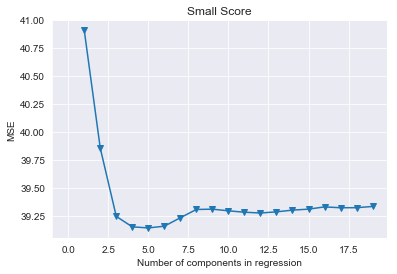

In [52]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of components in regression')
plt.ylabel('MSE')
plt.title('Small Score')
plt.xlim(xmin=-1);

C:\Users\matt0\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


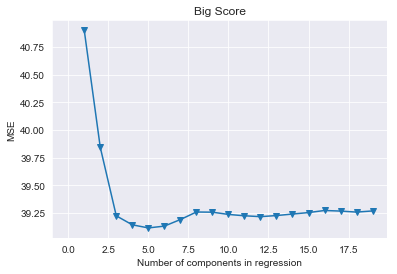

In [55]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=20, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of components in regression')
plt.ylabel('MSE')
plt.title('Big Score')
plt.xlim(xmin=-1);


In [56]:
RB = pd.read_excel('Input/Totals/RB.xlsx')
RBavg = pd.DataFrame()
RBavg['Name'] = RB['Name']
RBavg['Team'] = RB['Team']
RBavg['Rank'] = RB['Rank']
RBavg['RushesGame'] = RB['RushingAttempts'] / RB['Played']
RBavg['RushYardGame'] = RB['RushingYards'] / RB['Played']
RBavg['YardAttempt'] = RB['RushingYardsPerAttempt']
RBavg['RushTdGame'] = RB['RushingTouchdowns'] / RB['Played']
RBavg['TargetsGame'] = RB['ReceivingTargets'] / RB['Played']
RBavg['RecGame'] = RB['Receptions'] / RB['Played']
RBavg['RecYardsGame'] = RB['ReceivingYards'] / RB['Played']
RBavg['RecTdGame'] = RB['ReceivingTouchdowns'] / RB['Played']
RBavg['PointsGame'] = RB['FantasyPointsPerGameDraftKings']
RBavg = RBavg.set_index('Name')
RBavg.head()

,Team,Rank,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame
Name,,,,,,,,,,,
Todd Gurley,LAR,1,18.285714,89.357143,4.9,1.214286,5.785714,4.214286,41.428571,0.285714,27.9
Christian McCaffrey,CAR,2,13.857143,69.928571,5.0,0.500000,7.857143,6.714286,54.857143,0.428571,26.2
Saquon Barkley,NYG,3,15.928571,82.500000,5.2,0.642857,7.571429,5.857143,46.714286,0.285714,25.8
Alvin Kamara,NO,4,13.357143,61.428571,4.6,0.857143,7.071429,5.500000,44.785714,0.285714,24.0
Ezekiel Elliott,DAL,5,20.428571,96.428571,4.7,0.428571,6.357143,5.142857,38.785714,0.214286,24.0


In [57]:
RB.columns

Index(['Rank', 'Name', 'Team', 'Position', 'Played', 'RushingAttempts',
       'RushingYards', 'RushingYardsPerAttempt', 'RushingTouchdowns',
       'ReceivingTargets', 'Receptions', 'ReceivingYards',
       'ReceivingTouchdowns', 'Fumbles', 'FumblesLost',
       'FantasyPointsPerGameDraftKings', 'FantasyPointsDraftKings'],
      dtype='object')

In [58]:
RB_RZ = pd.read_excel('Input/RZ/RBRZ.xlsx')
RBRZavg = pd.DataFrame()
RBRZavg['Name'] = RB_RZ['Name']
RBRZavg['RZattemptsGame'] = RB_RZ['RushingAttempts'] / RB_RZ['Played']
RBRZavg['RZyardsGame'] = RB_RZ['RushingYards'] / RB_RZ['Played']
RBRZavg['RZYardAtt'] = RB_RZ['RushingYardsPerAttempt']
RBRZavg['RZTDGame'] = RB_RZ['RushingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZTarGame'] = RB_RZ['ReceivingTargets'] / RB_RZ['Played']
RBRZavg['RZRecGame'] = RB_RZ['Receptions'] / RB_RZ['Played']
RBRZavg['RZRecYarGame'] = RB_RZ['ReceivingYards'] / RB_RZ['Played']
RBRZavg['RZRecTDGame'] = RB_RZ['ReceivingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZPointsGame'] = RB_RZ['FantasyPointsPerGameDraftKings']
RBRZ = RBRZavg.set_index('Name')
RBRZ.head()

,RZattemptsGame,RZyardsGame,RZYardAtt,RZTDGame,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame
Name,,,,,,,,,
Todd Gurley,4.571429,14.571429,3.2,1.214286,1.357143,0.642857,5.571429,0.214286,11.7
Alvin Kamara,3.571429,12.357143,3.5,0.785714,1.714286,1.428571,8.857143,0.214286,10.0
Christian McCaffrey,2.785714,8.000000,2.9,0.500000,1.000000,0.857143,5.428571,0.357143,7.3
Melvin Gordon,2.000000,11.100000,5.6,0.700000,1.300000,0.800000,3.300000,0.300000,8.6
James Conner,2.750000,7.333333,2.7,0.750000,0.583333,0.500000,3.000000,0.083333,6.9


In [59]:
RB_RZ.columns

Index(['Rank', 'Name', 'Team', 'Position', 'Played', 'RushingAttempts',
       'RushingYards', 'RushingYardsPerAttempt', 'RushingTouchdowns',
       'ReceivingTargets', 'Receptions', 'ReceivingYards',
       'ReceivingTouchdowns', 'Fumbles', 'FumblesLost',
       'FantasyPointsPerGameDraftKings', 'FantasyPointsDraftKings'],
      dtype='object')

In [60]:
RBsnaps = pd.read_excel('Input/Totals/RBSnap.xlsx')
RBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Brandon Bolden,MIA,RB,14,10,0.7,1.2,40.0,10.0,50.0,50.0,21.20,212.0
1,2,Darrel Williams,KC,RB,3,20,6.7,4.3,10.0,15.0,25.0,25.0,13.00,65.0
2,3,Nick Chubb,CLE,RB,14,334,23.9,34.6,49.1,6.9,53.9,56.0,186.00,55.7
3,4,Derrick Henry,TEN,RB,14,342,24.4,38.8,52.0,4.7,56.4,57.3,180.56,52.8
4,5,Zach Zenner,DET,RB,6,54,9.0,13.6,48.1,9.3,55.6,57.4,29.10,53.9


In [61]:
RBsnaps.columns

Index(['Rank', 'Name', 'Team', 'Position', 'Played', 'SnapsPlayed',
       'SnapsPerGame', 'SnapsPlayedPercentage', 'RushSnapPercentage',
       'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'FantasyPointsDraftKings',
       'FantasyPointSnapPercentageDraftKings'],
      dtype='object')

In [62]:
RBsnaps = RBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'Played', 'Position', 'Rank'], axis=1)
RBsnaps = RBsnaps.set_index('Name')

In [63]:
RBDef = pd.DataFrame()
RBDef['Team'] = Defense['Team']
RBDef['DPointsAllowed'] = Defense['DraftKingsRunningbackFantasyPointsAllowedAverage']
RBDef = RBDef.set_index('Team')
RBDef.head()

,DPointsAllowed
Team,
BAL,18.89
MIN,23.31
BUF,26.79
JAX,21.36
TEN,18.54


In [64]:
RBSalaries = pd.read_excel('Input/Salaries/RBSalaries.xlsx').dropna()
RBSalaries = RBSalaries.drop(['Rk', 'Pos', 'WK', 'Opp Rank',
'Opp Pos Rank'], axis=1)
RBSalaries = RBSalaries.set_index('OPP')
RBSalaries.head()

,Name,Team,Salary,Projection
OPP,,,,
DAL,Saquon Barkley,NYG,8200.0,21.70
DEN,Melvin Gordon,LAC,8400.0,17.38
NO,Christian McCaffrey,CAR,9100.0,16.52
DET,Jamaal Williams,GB,6000.0,16.49
CIN,James Conner,PIT,7500.0,15.40


In [65]:
RBSalaries = RBSalaries.join(RBDef).join(RBDefense)
RBSalaries = RBSalaries.set_index('Team').join(Vegas).join(RBOffense)
RBSalaries.head()

,Name,Salary,Projection,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,David Johnson,5700.0,14.12,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,...,13.7,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,26.5
ARI,Chase Edmonds,4000.0,4.44,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,...,13.7,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,26.5
ARI,TJ Logan,3000.0,0.75,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,...,13.7,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,26.5
ARI,Derrick Coleman,3000.0,0.25,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,...,13.7,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,26.5
ATL,Tevin Coleman,4700.0,10.51,30.44,28.8,62.316625,386.834739,6.2,22.368238,11.362779,...,25.4,63.214607,378.859551,6.0,22.046629,12.842697,45.6,3.139326,63.6,33.3


In [66]:
RBSalaries.columns

Index(['Name', 'Salary', 'Projection', 'DPointsAllowed',
       'OpponentPointsPerGame', 'OpponentOffensivePlays',
       'OpponentOffensiveYards', 'OpponentOffensiveYardsPerPlay',
       'OpponentFirstDowns', 'OpponentThirdDownAttempts',
       'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts',
       'OpponentRedZonePercentage', 'OpponentRushingYards',
       'OpponentRushingYardsPerAttempt', 'TacklesForLossPercentage',
       'OpponentRushingTouchdowns', 'Week', 'Home', 'PointSpread', 'OverUnder',
       'total', 'PointsPerGame', 'OffensivePlays', 'OffensiveYards',
       'OffensiveYardsPerPlay', 'FirstDowns', 'ThirdDownAttempts',
       'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage',
       'OpponentTacklesForLossPercentage'],
      dtype='object')

In [67]:
RBSalaries = RBSalaries.set_index('Name')
RBSalaries.head()

,Salary,Projection,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,5700.0,14.12,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,13.7,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,26.5
Chase Edmonds,4000.0,4.44,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,13.7,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,26.5
TJ Logan,3000.0,0.75,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,13.7,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,26.5
Derrick Coleman,3000.0,0.25,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,13.7,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,26.5
Tevin Coleman,4700.0,10.51,30.44,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,25.4,63.214607,378.859551,6.0,22.046629,12.842697,45.6,3.139326,63.6,33.3


In [68]:

RBs = RBSalaries.join(RBavg).join(RBRZ).join(RBsnaps).dropna()
RBs.head()

,Salary,Projection,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRecTDGame,RZPointsGame,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,5700.0,14.12,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,0.071429,4.6,657.0,46.9,79.7,35.2,10.2,42.2,45.4,34.4
Chase Edmonds,4000.0,4.44,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,0.000000,1.1,170.0,12.1,20.6,29.4,11.2,39.4,40.6,33.1
TJ Logan,3000.0,0.75,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,0.000000,0.2,21.0,2.6,4.3,9.5,33.3,42.9,42.9,51.9
Derrick Coleman,3000.0,0.25,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,0.000000,0.0,65.0,4.6,7.9,3.1,4.6,6.2,7.7,6.2
Tevin Coleman,4700.0,10.51,30.44,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,0.285714,3.4,525.0,37.5,56.1,28.4,8.0,34.3,36.4,34.7


In [69]:
X_test = RBs[X_train.columns]
X_test

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,RZattemptsGame,...,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,OpponentRushingYards,OpponentRushingYardsPerAttempt,TacklesForLossPercentage,OpponentRushingTouchdowns
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,16.500000,60.214286,3.6,0.500000,4.785714,3.285714,29.142857,0.142857,16.2,1.857143,...,6.1,20.685274,11.022603,35.7,3.220890,48.9,112.516438,4.9,21.7,0.644178
Chase Edmonds,3.571429,12.428571,3.5,0.142857,1.357143,1.214286,7.000000,0.000000,4.0,0.571429,...,6.1,20.685274,11.022603,35.7,3.220890,48.9,112.516438,4.9,21.7,0.644178
TJ Logan,0.250000,0.250000,1.0,0.000000,0.875000,0.875000,4.625000,0.000000,1.4,0.000000,...,6.1,20.685274,11.022603,35.7,3.220890,48.9,112.516438,4.9,21.7,0.644178
Derrick Coleman,0.142857,0.214286,1.5,0.000000,0.214286,0.142857,1.214286,0.000000,0.3,0.000000,...,6.1,20.685274,11.022603,35.7,3.220890,48.9,112.516438,4.9,21.7,0.644178
Tevin Coleman,10.642857,50.285714,4.7,0.214286,3.000000,2.214286,19.071429,0.357143,13.0,1.142857,...,6.2,22.368238,11.362779,40.3,3.644665,78.4,128.206452,4.8,21.8,1.214888
Brian Hill,0.571429,1.714286,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,...,6.2,22.368238,11.362779,40.3,3.644665,78.4,128.206452,4.8,21.8,1.214888
Ricky Ortiz,0.000000,0.000000,0.0,0.000000,0.300000,0.200000,0.700000,0.000000,0.3,0.000000,...,6.2,22.368238,11.362779,40.3,3.644665,78.4,128.206452,4.8,21.8,1.214888
Devonta Freeman,7.000000,34.000000,4.9,0.000000,3.500000,2.500000,11.500000,0.000000,7.0,1.500000,...,6.2,22.368238,11.362779,40.3,3.644665,78.4,128.206452,4.8,21.8,1.214888
Gus Edwards,12.333333,61.111111,5.0,0.222222,0.111111,0.111111,0.777778,0.000000,8.9,1.444444,...,5.6,24.184483,13.523276,37.6,3.434483,62.5,126.288793,4.5,22.2,1.287931


In [70]:
X_train.columns

Index(['RushesGame', 'RushYardGame', 'YardAttempt', 'RushTdGame',
       'TargetsGame', 'RecGame', 'RecYardsGame', 'RecTdGame', 'PointsGame',
       'RZattemptsGame', 'RZyardsGame', 'RZYardAtt', 'RZTDGame', 'RZTarGame',
       'RZRecGame', 'RZRecYarGame', 'RZRecTDGame', 'RZPointsGame',
       'SnapsPlayedPercentage', 'RushSnapPercentage', 'TargetSnapPercentage',
       'TouchSnapPercentage', 'IntendedTouchSnapPercentage', 'DPointsAllowed',
       'Home', 'PointSpread', 'OverUnder', 'total', 'PointsPerGame',
       'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay',
       'FirstDowns', 'ThirdDownAttempts', 'ThirdDownPercentage',
       'RedZoneAttempts', 'RedZonePercentage',
       'OpponentTacklesForLossPercentage', 'OpponentPointsPerGame',
       'OpponentOffensivePlays', 'OpponentOffensiveYards',
       'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns',
       'OpponentThirdDownAttempts', 'OpponentThirdDownPercentage',
       'OpponentRedZoneAttempts', 'OpponentRedZoneP

In [71]:
pls = PLSRegression(n_components=4)
pls.fit(scale(X_train), y_train)
PLSProjections = pls.predict(scale(X_test))

C:\Users\matt0\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
regr2 = RandomForestRegressor(n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=20, \
                              bootstrap=True, random_state=1)
regr2.fit(X_train, y_train)
RBRFproj = regr2.predict(X_test)

In [74]:
RBs['PLSProjections'] = PLSProjections
RBs['RFProjections'] = RBRFproj
RBs

,Salary,Projection,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,5700.0,14.12,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,657.0,46.9,79.7,35.2,10.2,42.2,45.4,34.4,15.070843,15.695598
Chase Edmonds,4000.0,4.44,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,170.0,12.1,20.6,29.4,11.2,39.4,40.6,33.1,3.983039,5.033407
TJ Logan,3000.0,0.75,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,21.0,2.6,4.3,9.5,33.3,42.9,42.9,51.9,0.526993,1.894456
Derrick Coleman,3000.0,0.25,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,65.0,4.6,7.9,3.1,4.6,6.2,7.7,6.2,-0.367266,0.706894
Tevin Coleman,4700.0,10.51,30.44,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,525.0,37.5,56.1,28.4,8.0,34.3,36.4,34.7,11.550055,14.751549
Brian Hill,3900.0,6.96,30.44,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,20.0,2.9,3.0,20.0,0.0,20.0,20.0,6.0,1.192251,2.181149
Ricky Ortiz,3000.0,0.13,30.44,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,103.0,10.3,11.0,0.0,2.9,1.9,2.9,2.6,0.690892,0.808202
Devonta Freeman,3000.0,0.00,30.44,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,67.0,33.5,32.7,20.9,10.4,28.4,31.3,21.0,9.086742,11.293810
Gus Edwards,4400.0,10.39,28.29,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,...,228.0,25.3,35.1,48.7,0.4,49.1,49.1,35.0,9.142292,10.713740


In [75]:
#RBs.to_excel('Projections17/RBWeek17.xlsx')


In [76]:
RBScores = pd.read_excel('input/Scores/RBScores.xlsx')
RB = pd.DataFrame({'Name': [], 'Score': []})
RB['Name'] = RBScores['Name']
RB['Score'] = RBScores['FPTS']
RB = RB.set_index('Name')
RBs = RBs.join(RB)
RBs = RBs.dropna()
RBs

,Salary,Projection,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,5700.0,14.12,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,46.9,79.7,35.2,10.2,42.2,45.4,34.4,15.070843,15.695598,11.8
Chase Edmonds,4000.0,4.44,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,12.1,20.6,29.4,11.2,39.4,40.6,33.1,3.983039,5.033407,3.8
TJ Logan,3000.0,0.75,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,2.6,4.3,9.5,33.3,42.9,42.9,51.9,0.526993,1.894456,0.0
Derrick Coleman,3000.0,0.25,26.26,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,4.6,7.9,3.1,4.6,6.2,7.7,6.2,-0.367266,0.706894,0.0
Tevin Coleman,4700.0,10.51,30.44,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,37.5,56.1,28.4,8.0,34.3,36.4,34.7,11.550055,14.751549,12.4
Brian Hill,3900.0,6.96,30.44,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,2.9,3.0,20.0,0.0,20.0,20.0,6.0,1.192251,2.181149,4.9
Ricky Ortiz,3000.0,0.13,30.44,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,10.3,11.0,0.0,2.9,1.9,2.9,2.6,0.690892,0.808202,0.0
Gus Edwards,4400.0,10.39,28.29,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,...,25.3,35.1,48.7,0.4,49.1,49.1,35.0,9.142292,10.713740,7.6
Kenneth Dixon,3800.0,7.88,28.29,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,...,25.5,33.0,39.2,2.9,42.2,42.2,36.0,8.250012,10.352099,15.9


In [77]:
y_test = RBs.Score
y_pred = RBs.PLSProjections
mean_squared_error(y_test, y_pred)

37.395272290919024

In [78]:
y_test = RBs.Score
y_pred = RBs.RFProjections
mean_squared_error(y_test, y_pred)

41.07107297708128

In [81]:
y_test = RBs.Score
y_pred = RBs.PointsGame
mean_squared_error(y_test, y_pred)

45.124270833333334

In [82]:
WRtrain = pd.read_excel('WRBig.xlsx')


In [83]:
WRtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,...,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000
mean,4.847235,2.953577,53.327086,37.829632,0.244868,6.787574,10.598922,0.140064,0.781892,0.817316,...,55.747402,6.247372,14.972307,114.321069,63.330662,239.201480,6.808665,10.744630,1.591193,88.564308
std,3.185265,2.095207,20.600791,28.319435,0.278585,3.310214,5.236860,0.352610,2.394510,2.496857,...,8.767282,1.328801,2.276489,141.156567,3.477609,24.018046,0.604331,0.749195,0.365750,9.283538
min,0.000000,0.000000,0.000000,-2.000000,0.000000,-2.000000,-2.000000,0.000000,-7.000000,-7.000000,...,34.800000,2.800000,9.800000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,2.250000,1.200000,43.353846,13.818182,0.000000,4.845455,7.575000,0.000000,0.000000,0.000000,...,50.000000,5.400000,13.300000,34.187500,60.600000,225.187500,6.400000,10.200000,1.312500,82.000000
50%,4.571429,2.666667,56.845455,33.875000,0.181818,7.000000,10.920000,0.000000,0.000000,0.000000,...,55.300000,6.200000,14.600000,35.812500,63.400000,237.900469,6.800000,10.700000,1.562500,89.000000
75%,7.000000,4.400000,66.700000,56.250000,0.375000,8.783333,13.636364,0.125000,0.250000,0.250000,...,60.000000,7.100000,16.600000,40.937500,65.200000,252.375000,7.200000,11.200000,1.875000,95.000000
max,19.000000,16.000000,100.000000,180.000000,2.000000,31.300000,50.000000,4.000000,31.000000,34.000000,...,88.900000,10.100000,22.300000,535.000000,74.700000,313.333333,8.900000,13.600000,2.812500,123.000000


In [84]:
X_train = WRtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = WRtrain.Score

In [85]:
WR = pd.read_excel('Input/Totals/WR.xlsx')
WRavg = pd.DataFrame()
WRavg['Name'] = WR['Name']
WRavg['Rank'] = WR['Rank']
WRavg['Team'] = WR['Team']
WRavg['TargetsGame'] = WR['ReceivingTargets'] / WR['Played']
WRavg['RecGame'] = WR['Receptions'] / WR['Played']
WRavg['RecPercentage'] = WR['ReceptionPercentage']
WRavg['RecYardsGame'] = WR['ReceivingYards'] / WR['Played']
WRavg['RecTdGame'] = WR['ReceivingTouchdowns'] / WR['Played']
WRavg['YardsTarget'] = WR['ReceivingYardsPerTarget']
WRavg['RecYardsRec'] = WR['ReceivingYardsPerReception']
WRavg['RushesGame'] = WR['RushingAttempts'] / WR['Played']
WRavg['RushYardsGame'] = WR['RushingYards'] / WR['Played']
WRavg['YardAttempt'] = WR['RushingYardsPerAttempt']
WRavg['RushTdGame'] = WR['RushingTouchdowns']
WRavg['PointsGame'] = WR['FantasyPointsPerGameDraftKings']
WRavg = WRavg.set_index('Name')
WRavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Davante Adams,1,GB,10.785714,7.142857,66.2,93.928571,0.857143,8.7,13.2,0.000000,0.000000,0.0,0,22.9
Adam Thielen,2,MIN,10.357143,7.500000,72.4,89.642857,0.642857,8.7,12.0,0.214286,2.000000,9.3,0,22.5
Julio Jones,3,ATL,10.857143,7.142857,65.8,107.928571,0.428571,9.9,15.1,0.142857,0.857143,6.0,0,22.4
Tyreek Hill,4,KC,8.642857,5.571429,64.5,93.142857,0.785714,10.8,16.7,1.357143,8.500000,6.3,0,22.0
DeAndre Hopkins,5,HOU,9.642857,6.714286,69.6,94.357143,0.785714,9.8,14.1,0.071429,-0.500000,-7.0,0,21.7


In [86]:
WRRZ = pd.read_excel('Input/RZ/WRRZ.xlsx')
WRRZavg = pd.DataFrame()
WRRZavg['Name'] = WRRZ['Name']
WRRZavg['RZTargetsGame'] = WRRZ['ReceivingTargets'] / WRRZ['Played']
WRRZavg['RZRecGame'] = WRRZ['Receptions'] / WRRZ['Played']
WRRZavg['RZRecPercentage'] = WRRZ['ReceptionPercentage']
WRRZavg['RZRecYardsGame'] = WRRZ['ReceivingYards'] / WRRZ['Played']
WRRZavg['RZRecTdGame'] = WRRZ['ReceivingTouchdowns'] / WRRZ['Played']
WRRZavg['RZYardsTarget'] = WRRZ['ReceivingYardsPerTarget']
WRRZavg['RZRecYardsRec'] = WRRZ['ReceivingYardsPerReception']
WRRZavg['RZRushesGame'] = WRRZ['RushingAttempts'] / WRRZ['Played']
WRRZavg['RZRushYardsGame'] = WRRZ['RushingYards'] / WRRZ['Played']
WRRZavg['RZYardAttempt'] = WRRZ['RushingYardsPerAttempt']
WRRZavg['RZRushTdGame'] = WRRZ['RushingTouchdowns'] / WRRZ['Played']
WRRZavg['RZPointsGame'] = WRRZ['FantasyPointsPerGameDraftKings']
WRRZ = WRRZavg.set_index('Name')
WRRZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Davante Adams,2.000000,1.071429,53.6,9.500000,0.785714,4.8,8.9,0.0,0.0,0.0,0.0,6.9
DeAndre Hopkins,1.642857,0.928571,56.5,8.500000,0.571429,5.2,9.2,0.0,0.0,0.0,0.0,5.2
Michael Thomas,1.714286,1.357143,79.2,9.214286,0.428571,5.4,6.8,0.0,0.0,0.0,0.0,4.8
Adam Thielen,1.357143,1.000000,73.7,6.000000,0.428571,4.4,6.0,0.0,0.0,0.0,0.0,4.2
Keenan Allen,1.071429,0.785714,73.3,7.285714,0.428571,6.8,9.3,0.0,0.0,0.0,0.0,4.2


In [87]:

WRsnaps = pd.read_excel('Input/Totals/WRSnap.xlsx')
WRsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Tim White,BAL,WR,3,2,0.7,0.8,0.0,50.0,50.0,50.0,2.40,120.0
1,2,Darren Waller,OAK,WR,2,13,6.5,10.3,7.7,7.7,15.4,15.4,7.50,57.7
2,3,Leonte Carroo,MIA,WR,7,40,5.7,10.0,2.5,7.5,7.5,10.0,18.80,47.0
3,4,Albert Wilson,MIA,WR,7,231,33.0,48.2,3.5,15.2,15.2,19.0,99.78,43.2
4,5,Cordarrelle Patterson,NE,WR,14,214,15.3,21.9,17.8,12.1,27.1,29.9,89.60,41.9


In [88]:
WRsnaps = WRsnaps.drop(['Team', 'FantasyPointsDraftKings', 'Played', 'Position', 'Rank'], axis=1)
WRsnaps = WRsnaps.set_index('Name')

In [89]:
WRDef = pd.DataFrame()
WRDef['Team'] = Defense['Team']
WRDef['DPointsAllowed'] = Defense['DraftKingsWideReceiverFantasyPointsAllowedAverage']
WRDef = WRDef.set_index('Team')
WRDef.head()

,DPointsAllowed
Team,
BAL,29.64
MIN,28.65
BUF,30.11
JAX,28.23
TEN,39.45


In [90]:
WRSalaries = pd.read_excel('Input/Salaries/WRSalaries.xlsx').dropna()
WRSalaries = WRSalaries.drop(['Rk', 'Pos', 'WK', 'Opp Rank', \
'Opp Pos Rank'], axis=1)
WRSalaries = WRSalaries.set_index('OPP')
WRSalaries.head()

,Name,Team,Salary,Projection
OPP,,,,
JAX,DeAndre Hopkins,HOU,8100.0,18.54
CIN,JuJu Smith-Schuster,PIT,8300.0,18.44
OAK,Tyreek Hill,KC,8400.0,17.78
TB,Julio Jones,ATL,8500.0,17.71
SF,Robert Woods,LAR,6900.0,17.21


In [91]:
WRSalaries = WRSalaries.join(WRDef).join(QBDefense)
WRSalaries = WRSalaries.set_index('Team').join(Vegas).join(WROffense)
WRSalaries.head()

,Name,Salary,Projection,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Larry Fitzgerald,4900.0,12.31,38.66,20.9,59.47911,360.453425,6.1,20.685274,11.022603,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
ARI,Trent Sherfield,3200.0,8.03,38.66,20.9,59.47911,360.453425,6.1,20.685274,11.022603,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
ARI,Chad Williams,3000.0,5.02,38.66,20.9,59.47911,360.453425,6.1,20.685274,11.022603,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
ARI,Pharoh Cooper,3000.0,0.20,38.66,20.9,59.47911,360.453425,6.1,20.685274,11.022603,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
ARI,JJ Nelson,3000.0,0.00,38.66,20.9,59.47911,360.453425,6.1,20.685274,11.022603,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64


In [92]:
WRSalaries = WRSalaries.set_index('Name')
WRSalaries.head()

,Salary,Projection,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,4900.0,12.31,38.66,20.9,59.47911,360.453425,6.1,20.685274,11.022603,35.7,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
Trent Sherfield,3200.0,8.03,38.66,20.9,59.47911,360.453425,6.1,20.685274,11.022603,35.7,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
Chad Williams,3000.0,5.02,38.66,20.9,59.47911,360.453425,6.1,20.685274,11.022603,35.7,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
Pharoh Cooper,3000.0,0.20,38.66,20.9,59.47911,360.453425,6.1,20.685274,11.022603,35.7,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
JJ Nelson,3000.0,0.00,38.66,20.9,59.47911,360.453425,6.1,20.685274,11.022603,35.7,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64


In [93]:
WRs = WRSalaries.join(WRavg).join(WRRZ).join(WRsnaps).dropna()
WRs.head()

,Salary,Projection,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRushTdGame,RZPointsGame,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,4900.0,12.31,38.66,20.9,59.47911,360.453425,6.1,20.685274,11.022603,35.7,...,0.0,2.8,755.0,53.9,91.6,0.0,12.5,7.8,12.5,21.0
Trent Sherfield,3200.0,8.03,38.66,20.9,59.47911,360.453425,6.1,20.685274,11.022603,35.7,...,0.0,0.7,247.0,22.5,34.3,0.0,7.3,4.5,7.3,11.9
Chad Williams,3000.0,5.02,38.66,20.9,59.47911,360.453425,6.1,20.685274,11.022603,35.7,...,0.0,0.2,350.0,43.8,42.5,0.0,8.9,3.1,8.9,8.1
Pharoh Cooper,3000.0,0.20,38.66,20.9,59.47911,360.453425,6.1,20.685274,11.022603,35.7,...,0.0,0.0,6.0,1.2,1.7,0.0,16.7,0.0,16.7,0.0
JJ Nelson,3000.0,0.00,38.66,20.9,59.47911,360.453425,6.1,20.685274,11.022603,35.7,...,0.0,0.0,213.0,15.2,25.8,1.9,8.9,5.2,10.8,6.3


In [94]:

X_test = WRs[X_train.columns]
X_test

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,6.714286,4.214286,62.8,46.071429,0.357143,6.9,10.9,0.000000,0.000000,0.0,...,48.9,7.1,17.7,472,66.5,247.936986,7.3,11.0,1.574658,93
Trent Sherfield,1.636364,1.000000,61.1,11.363636,0.090909,6.9,11.4,0.000000,0.000000,0.0,...,48.9,7.1,17.7,472,66.5,247.936986,7.3,11.0,1.574658,93
Chad Williams,3.875000,1.375000,35.5,14.125000,0.125000,3.6,10.3,0.000000,0.000000,0.0,...,48.9,7.1,17.7,472,66.5,247.936986,7.3,11.0,1.574658,93
Pharoh Cooper,0.200000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,48.9,7.1,17.7,472,66.5,247.936986,7.3,11.0,1.574658,93
JJ Nelson,1.357143,0.500000,36.8,4.571429,0.000000,3.4,9.1,0.285714,0.000000,0.0,...,48.9,7.1,17.7,472,66.5,247.936986,7.3,11.0,1.574658,93
Jalen Tolliver,1.500000,1.000000,66.7,11.000000,0.000000,7.3,11.0,0.000000,0.000000,0.0,...,48.9,7.1,17.7,472,66.5,247.936986,7.3,11.0,1.574658,93
Julio Jones,10.857143,7.142857,65.8,107.928571,0.428571,9.9,15.1,0.142857,0.857143,6.0,...,78.4,7.2,17.6,464,72.2,258.628288,7.8,10.8,2.143921,109
Calvin Ridley,5.857143,4.000000,68.3,49.928571,0.571429,8.5,12.5,0.428571,1.928571,4.5,...,78.4,7.2,17.6,464,72.2,258.628288,7.8,10.8,2.143921,109
Mohamed Sanu,5.428571,3.857143,71.1,47.642857,0.214286,8.8,12.4,0.285714,0.928571,3.2,...,78.4,7.2,17.6,464,72.2,258.628288,7.8,10.8,2.143921,109


In [95]:
pls = PLSRegression(n_components=7)
pls.fit(scale(X_train), y_train)
PLSProjections = pls.predict(scale(X_test))

C:\Users\matt0\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
regr2 = RandomForestRegressor(n_estimators=160, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=10, \
                              bootstrap=True, random_state=1)
regr2.fit(X_train, y_train)
WRRFproj = regr2.predict(X_test)

In [97]:
WRs['PLSProjections'] = PLSProjections
WRs['RFProjections'] = WRRFproj
WRs

,Salary,Projection,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,4900.0,12.31,38.66,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,755.0,53.9,91.6,0.0,12.5,7.8,12.5,21.0,12.112355,10.839529
Trent Sherfield,3200.0,8.03,38.66,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,247.0,22.5,34.3,0.0,7.3,4.5,7.3,11.9,2.546798,4.251209
Chad Williams,3000.0,5.02,38.66,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,350.0,43.8,42.5,0.0,8.9,3.1,8.9,8.1,5.394868,5.555762
Pharoh Cooper,3000.0,0.20,38.66,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,6.0,1.2,1.7,0.0,16.7,0.0,16.7,0.0,0.255677,1.476524
JJ Nelson,3000.0,0.00,38.66,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,213.0,15.2,25.8,1.9,8.9,5.2,10.8,6.3,2.529734,2.980715
Jalen Tolliver,3000.0,0.00,38.66,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,55.0,27.5,39.6,0.0,5.5,3.6,5.5,7.6,3.308851,5.007669
Julio Jones,8500.0,17.71,39.63,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,743.0,53.1,79.5,0.3,20.5,13.7,20.7,42.2,21.953670,20.748372
Calvin Ridley,5300.0,11.67,39.63,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,570.0,40.7,61.0,1.1,14.4,10.9,15.4,31.3,14.078359,11.145647
Mohamed Sanu,4800.0,10.92,39.63,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,736.0,52.6,78.7,0.5,10.3,8.0,11.0,19.6,14.109576,11.139055


In [98]:
#WRs.to_excel('Projections17/WRWeek17.xlsx')

In [99]:
WRScores = pd.read_excel('input/Scores/WRScores.xlsx')
WR = pd.DataFrame({'Name': [], 'Score': []})
WR['Name'] = WRScores['Name']
WR['Score'] = WRScores['FPTS']
WR = WR.set_index('Name')
WRs = WRs.join(WR)
WRs = WRs.dropna()
WRs

,Salary,Projection,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,4900.0,12.31,38.66,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,53.9,91.6,0.0,12.5,7.8,12.5,21.0,12.112355,10.839529,13.6
Trent Sherfield,3200.0,8.03,38.66,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,22.5,34.3,0.0,7.3,4.5,7.3,11.9,2.546798,4.251209,4.3
Chad Williams,3000.0,5.02,38.66,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,43.8,42.5,0.0,8.9,3.1,8.9,8.1,5.394868,5.555762,11.0
Pharoh Cooper,3000.0,0.20,38.66,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,1.2,1.7,0.0,16.7,0.0,16.7,0.0,0.255677,1.476524,0.0
Julio Jones,8500.0,17.71,39.63,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,53.1,79.5,0.3,20.5,13.7,20.7,42.2,21.953670,20.748372,31.8
Calvin Ridley,5300.0,11.67,39.63,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,40.7,61.0,1.1,14.4,10.9,15.4,31.3,14.078359,11.145647,14.2
Mohamed Sanu,4800.0,10.92,39.63,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,52.6,78.7,0.5,10.3,8.0,11.0,19.6,14.109576,11.139055,20.4
Justin Hardy,3000.0,2.75,39.63,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,13.9,20.9,0.0,10.3,7.2,10.3,20.2,5.944289,4.296714,0.0
Marvin Hall,3000.0,1.43,39.63,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,11.7,17.5,1.2,10.4,7.3,11.6,18.8,5.593184,3.098882,0.0


In [100]:
y_test = WRs.Score
y_pred = WRs.PLSProjections
mean_squared_error(y_test, y_pred)

43.567003190715404

In [101]:
y_test = WRs.Score
y_pred = WRs.RFProjections
mean_squared_error(y_test, y_pred)

44.16936431020504

In [102]:
y_test = WRs.Score
y_pred = WRs.PointsGame
mean_squared_error(y_test, y_pred)

46.90674516129032

In [103]:
TEtrain = pd.read_excel('TEBig.xlsx')

In [104]:
TEtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,...,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000
mean,3.271695,2.165516,55.366585,24.335687,0.195245,6.146591,8.545867,0.009539,0.031148,0.055524,...,55.862570,6.262135,14.963066,118.957189,63.366108,239.540621,6.818250,10.753414,1.597948,88.667908
std,2.441962,1.693805,21.967002,20.820687,0.243670,3.286346,4.540343,0.048061,0.239737,0.546318,...,8.965907,1.346978,2.283251,144.508700,3.520194,24.390979,0.613156,0.754393,0.372174,9.411604
min,0.000000,0.000000,0.000000,-0.600000,0.000000,-0.600000,-0.600000,0.000000,-0.800000,-2.700000,...,34.800000,2.800000,9.800000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,1.200000,0.800000,42.420455,7.800000,0.000000,4.166667,5.384615,0.000000,0.000000,0.000000,...,50.000000,5.400000,13.300000,34.250000,60.600000,225.187500,6.400000,10.200000,1.312500,82.000000
50%,2.577381,1.696154,59.716667,18.500000,0.125000,6.092308,8.678889,0.000000,0.000000,0.000000,...,55.600000,6.300000,14.700000,36.125000,63.400000,237.875000,6.800000,10.700000,1.562500,89.000000
75%,5.000000,3.333333,70.516346,36.627273,0.300000,8.088333,11.266667,0.000000,0.000000,0.000000,...,60.500000,7.100000,16.600000,262.000000,65.200000,254.062500,7.200000,11.200000,1.875000,95.000000
max,14.000000,9.000000,100.000000,114.500000,3.000000,33.750000,41.000000,1.000000,5.500000,10.000000,...,88.900000,10.100000,22.300000,535.000000,74.700000,313.333333,8.900000,13.600000,2.812500,123.000000


In [105]:
X_train = TEtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = TEtrain.Score

In [106]:
TE = pd.read_excel('Input/Totals/TE.xlsx')
TEavg = pd.DataFrame()
TEavg['Name'] = TE['Name']
TEavg['Rank'] = TE['Rank']
TEavg['Team'] = TE['Team']
TEavg['TargetsGame'] = TE['ReceivingTargets'] / TE['Played']
TEavg['RecGame'] = TE['Receptions'] / TE['Played']
TEavg['RecPercentage'] = TE['ReceptionPercentage']
TEavg['RecYardsGame'] = TE['ReceivingYards'] / TE['Played']
TEavg['RecTdGame'] = TE['ReceivingTouchdowns'] / TE['Played']
TEavg['YardsTarget'] = TE['ReceivingYardsPerTarget']
TEavg['RecYardsRec'] = TE['ReceivingYardsPerReception']
TEavg['RushesGame'] = TE['RushingAttempts'] / TE['Played']
TEavg['RushYardsGame'] = TE['RushingYards'] / TE['Played']
TEavg['YardAttempt'] = TE['RushingYardsPerAttempt']
TEavg['RushTdGame'] = TE['RushingTouchdowns']
TEavg['PointsGame'] = TE['FantasyPointsPerGameDraftKings']
TEavg = TEavg.set_index('Name')
TEavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Travis Kelce,1,KC,9.428571,6.642857,70.5,87.142857,0.714286,9.2,13.1,0.000000,0.000000,0.0,0,20.6
Zach Ertz,2,PHI,9.714286,7.214286,74.3,74.142857,0.428571,7.6,10.3,0.000000,0.000000,0.0,0,18.1
George Kittle,3,SF,7.857143,5.142857,65.5,82.428571,0.285714,10.5,16.0,0.071429,0.714286,10.0,0,16.0
Eric Ebron,4,IND,7.071429,4.214286,59.6,47.285714,0.857143,6.7,11.2,0.214286,-0.571429,-2.7,1,14.6
Jared Cook,5,OAK,6.642857,4.500000,67.7,60.571429,0.428571,9.1,13.5,0.000000,0.000000,0.0,0,14.0


In [107]:
TERZ = pd.read_excel('Input/RZ/TERZ.xlsx')
TERZavg = pd.DataFrame()
TERZavg['Name'] = TERZ['Name']
TERZavg['RZTargetsGame'] = TERZ['ReceivingTargets'] / TERZ['Played']
TERZavg['RZRecGame'] = TERZ['Receptions'] / TERZ['Played']
TERZavg['RZRecPercentage'] = TERZ['ReceptionPercentage']
TERZavg['RZRecYardsGame'] = TERZ['ReceivingYards'] / TERZ['Played']
TERZavg['RZRecTdGame'] = TERZ['ReceivingTouchdowns'] / TERZ['Played']
TERZavg['RZYardsTarget'] = TERZ['ReceivingYardsPerTarget']
TERZavg['RZRecYardsRec'] = TERZ['ReceivingYardsPerReception']
TERZavg['RZRushesGame'] = TERZ['RushingAttempts'] / TERZ['Played']
TERZavg['RZRushYardsGame'] = TERZ['RushingYards'] / TERZ['Played']
TERZavg['RZYardAttempt'] = TERZ['RushingYardsPerAttempt']
TERZavg['RZRushTdGame'] = TERZ['RushingTouchdowns'] / TERZ['Played']
TERZavg['RZPointsGame'] = TERZ['FantasyPointsPerGameDraftKings']
TERZ = TERZavg.set_index('Name')
TERZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Eric Ebron,1.428571,0.785714,55.0,9.000000,0.714286,6.3,11.5,0.142857,0.071429,0.5,0.071429,6.4
Travis Kelce,1.642857,1.071429,65.2,8.357143,0.642857,5.1,7.8,0.000000,0.000000,0.0,0.000000,5.8
Zach Ertz,1.642857,0.857143,52.2,7.000000,0.428571,4.3,8.2,0.000000,0.000000,0.0,0.000000,4.1
Cameron Brate,0.785714,0.571429,72.7,5.142857,0.428571,6.5,9.0,0.000000,0.000000,0.0,0.000000,3.7
Trey Burton,0.857143,0.642857,75.0,3.928571,0.357143,4.6,6.1,0.071429,0.142857,2.0,0.000000,3.3


In [108]:
TEsnaps = pd.read_excel('input/Totals/TESnap.xlsx')
TEsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Erik Swoope,NO,TE,7,78,11.1,9.3,0.0,12.8,10.3,12.8,34.7,44.5
1,2,Jordan Franks,CIN,TE,3,11,3.7,5.9,0.0,27.3,18.2,27.3,5.7,51.8
2,3,Robert Tonyan Jr.,GB,TE,14,38,2.7,4.1,0.0,7.9,5.3,7.9,13.9,36.6
3,4,Eric Ebron,IND,TE,14,575,41.1,58.1,0.5,17.2,11.0,17.9,204.4,35.5
4,5,Anthony Firkser,TEN,TE,8,109,13.6,22.5,0.0,14.7,14.7,14.7,42.1,38.6


In [109]:
TEsnaps = TEsnaps.drop(['Team', 'FantasyPointsDraftKings', 'Played', 'Position', 'Rank'], axis=1)
TEsnaps = TEsnaps.set_index('Name')

In [110]:
TEDef = pd.DataFrame()
TEDef['Team'] = Defense['Team']
TEDef['DPointsAllowed'] = Defense['DraftKingsTightEndFantasyPointsAllowedAverage']
TEDef = TEDef.set_index('Team')
TEDef.head()

,DPointsAllowed
Team,
BAL,13.59
MIN,10.24
BUF,8.36
JAX,13.27
TEN,8.23


In [111]:
TESalaries = pd.read_excel('input/Salaries/TESalaries.xlsx').dropna()
TESalaries = TESalaries.drop(['Rk', 'Pos', 'WK', 'Opp Rank', \
'Opp Pos Rank'], axis=1)
TESalaries = TESalaries.set_index('OPP')
TESalaries.head()

,Name,Team,Salary,Projection
OPP,,,,
OAK,Travis Kelce,KC,7200.0,18.58
WAS,Zach Ertz,PHI,6700.0,15.90
LAR,George Kittle,SF,6300.0,15.88
DAL,Evan Engram,NYG,5300.0,12.11
KC,Jared Cook,OAK,5500.0,11.95


In [112]:
TESalaries = TESalaries.join(TEDef).join(QBDefense)
TESalaries = TESalaries.set_index('Team').join(Vegas).join(WROffense)
TESalaries.head()

,Name,Salary,Projection,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Jermaine Gresham,2500.0,3.02,9.37,20.9,59.479110,360.453425,6.1,20.685274,11.022603,...,30.4,1.712500,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
ARI,John Phillips,2500.0,2.16,9.37,20.9,59.479110,360.453425,6.1,20.685274,11.022603,...,30.4,1.712500,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
ARI,Darrell Daniels,2500.0,0.58,9.37,20.9,59.479110,360.453425,6.1,20.685274,11.022603,...,30.4,1.712500,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
ARI,Ricky Seals-Jones,2900.0,0.00,9.37,20.9,59.479110,360.453425,6.1,20.685274,11.022603,...,30.4,1.712500,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
ATL,Austin Hooper,3500.0,9.30,14.76,28.8,62.316625,386.834739,6.2,22.368238,11.362779,...,45.6,3.139326,63.6,38.956180,69.8,288.247191,7.4,10.6,2.140449,105


In [113]:
TESalaries = TESalaries.set_index('Name')
TESalaries.head()

,Salary,Projection,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Jermaine Gresham,2500.0,3.02,9.37,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,30.4,1.712500,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
John Phillips,2500.0,2.16,9.37,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,30.4,1.712500,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
Darrell Daniels,2500.0,0.58,9.37,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,30.4,1.712500,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
Ricky Seals-Jones,2900.0,0.00,9.37,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,30.4,1.712500,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
Austin Hooper,3500.0,9.30,14.76,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,45.6,3.139326,63.6,38.956180,69.8,288.247191,7.4,10.6,2.140449,105


In [114]:
TEs = TESalaries.join(TEavg).join(TERZ).join(TEsnaps).dropna()
TEs.head()

,Salary,Projection,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRushTdGame,RZPointsGame,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Jermaine Gresham,2500.0,3.02,9.37,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,0.0,0.2,370.0,30.8,51.0,0.0,3.2,2.4,3.2,4.7
John Phillips,2500.0,2.16,9.37,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,0.0,0.0,62.0,10.3,16.5,0.0,0.0,0.0,0.0,0.0
Darrell Daniels,2500.0,0.58,9.37,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,0.0,0.0,70.0,7.0,8.1,0.0,1.4,0.0,1.4,0.0
Ricky Seals-Jones,2900.0,0.00,9.37,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,0.0,0.0,533.0,38.1,64.7,0.0,12.9,6.2,12.9,13.7
Austin Hooper,3500.0,9.30,14.76,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,0.0,2.8,729.0,52.1,78.0,0.0,11.0,8.8,11.0,20.0


In [115]:
X_test = TEs[X_train.columns]
X_test

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Jermaine Gresham,1.000000,0.750000,75.0,7.833333,0.000000,7.8,10.4,0.000000,0.000000,0.0,...,48.9,7.1,17.7,472,66.5,247.936986,7.3,11.0,1.574658,93
John Phillips,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,48.9,7.1,17.7,472,66.5,247.936986,7.3,11.0,1.574658,93
Darrell Daniels,0.100000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,48.9,7.1,17.7,472,66.5,247.936986,7.3,11.0,1.574658,93
Ricky Seals-Jones,4.928571,2.357143,47.8,24.285714,0.071429,4.9,10.3,0.000000,0.000000,0.0,...,48.9,7.1,17.7,472,66.5,247.936986,7.3,11.0,1.574658,93
Austin Hooper,5.714286,4.571429,80.0,39.785714,0.285714,7.0,8.7,0.000000,0.000000,0.0,...,78.4,7.2,17.6,464,72.2,258.628288,7.8,10.8,2.143921,109
Logan Paulsen,0.615385,0.615385,100.0,5.538462,0.076923,9.0,9.0,0.000000,0.000000,0.0,...,78.4,7.2,17.6,464,72.2,258.628288,7.8,10.8,2.143921,109
Eric Saubert,0.642857,0.357143,55.6,3.428571,0.000000,5.3,9.6,0.000000,0.000000,0.0,...,78.4,7.2,17.6,464,72.2,258.628288,7.8,10.8,2.143921,109
Mark Andrews,3.071429,2.000000,65.1,29.642857,0.142857,9.7,14.8,0.000000,0.000000,0.0,...,62.5,5.2,13.3,583,62.8,275.545690,6.6,10.5,1.359483,81
Hayden Hurst,1.700000,1.000000,58.8,10.200000,0.100000,6.0,10.2,0.100000,0.000000,0.0,...,62.5,5.2,13.3,583,62.8,275.545690,6.6,10.5,1.359483,81


In [116]:
pls = PLSRegression(n_components=6)
pls.fit(scale(X_train), y_train)
PLSProjections = pls.predict(scale(X_test))

C:\Users\matt0\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
regr2 = RandomForestRegressor(n_estimators=146, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=50, \
                              bootstrap=True, random_state=1)
regr2.fit(X_train, y_train)
TERFproj = regr2.predict(X_test)

In [118]:
TEs['PLSProjections'] = PLSProjections
TEs['RFProjections'] = TERFproj
TEs

,Salary,Projection,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections
Name,,,,,,,,,,,,,,,,,,,,,
Jermaine Gresham,2500.0,3.02,9.37,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,370.0,30.8,51.0,0.0,3.2,2.4,3.2,4.7,2.486839,2.672776
John Phillips,2500.0,2.16,9.37,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,62.0,10.3,16.5,0.0,0.0,0.0,0.0,0.0,0.147437,0.950769
Darrell Daniels,2500.0,0.58,9.37,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,70.0,7.0,8.1,0.0,1.4,0.0,1.4,0.0,-0.066511,1.062598
Ricky Seals-Jones,2900.0,0.00,9.37,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,533.0,38.1,64.7,0.0,12.9,6.2,12.9,13.7,8.287633,6.183538
Austin Hooper,3500.0,9.30,14.76,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,729.0,52.1,78.0,0.0,11.0,8.8,11.0,20.0,14.102502,9.539944
Logan Paulsen,2500.0,1.88,14.76,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,308.0,23.7,32.9,0.0,2.6,2.6,2.6,6.9,4.636398,2.437451
Eric Saubert,2500.0,1.02,14.76,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,152.0,10.9,16.3,0.0,5.9,3.3,5.9,6.4,4.766362,1.940155
Mark Andrews,3100.0,5.48,15.19,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,...,367.0,26.2,34.9,0.0,11.7,7.6,11.7,22.2,8.596728,5.039932
Hayden Hurst,2500.0,3.03,15.19,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,...,237.0,23.7,32.2,0.4,7.2,4.6,7.6,11.1,6.637502,3.173164


In [119]:
#TEs.to_excel('Projections17/TEWeek17.xlsx')

In [120]:
TEScores = pd.read_excel('input/Scores/TEScores.xlsx')
TE = pd.DataFrame({'Name': [], 'Score': []})
TE['Name'] = TEScores['Name']
TE['Score'] = TEScores['FPTS']
TE = TE.set_index('Name')
TEs = TEs.join(TE)
TEs = TEs.dropna()
TEs

,Salary,Projection,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,PLSProjections,RFProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
John Phillips,2500.0,2.16,9.37,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,10.3,16.5,0.0,0.0,0.0,0.0,0.0,0.147437,0.950769,4.9
Darrell Daniels,2500.0,0.58,9.37,20.9,59.479110,360.453425,6.1,20.685274,11.022603,35.7,...,7.0,8.1,0.0,1.4,0.0,1.4,0.0,-0.066511,1.062598,0.0
Austin Hooper,3500.0,9.30,14.76,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,52.1,78.0,0.0,11.0,8.8,11.0,20.0,14.102502,9.539944,11.7
Logan Paulsen,2500.0,1.88,14.76,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,23.7,32.9,0.0,2.6,2.6,2.6,6.9,4.636398,2.437451,2.9
Eric Saubert,2500.0,1.02,14.76,28.8,62.316625,386.834739,6.2,22.368238,11.362779,40.3,...,10.9,16.3,0.0,5.9,3.3,5.9,6.4,4.766362,1.940155,0.0
Mark Andrews,3100.0,5.48,15.19,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,...,26.2,34.9,0.0,11.7,7.6,11.7,22.2,8.596728,5.039932,9.4
Hayden Hurst,2500.0,3.03,15.19,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,...,23.7,32.2,0.4,7.2,4.6,7.6,11.1,6.637502,3.173164,6.3
Nick Boyle,2500.0,2.32,15.19,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,...,41.1,54.8,0.0,6.1,3.6,6.1,7.1,7.959108,3.570377,0.0
Maxx Williams,2500.0,1.17,15.19,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,...,29.5,30.9,0.6,5.2,5.5,5.8,11.4,6.926097,4.118721,0.0


In [121]:
y_test = TEs.Score
y_pred = TEs.PLSProjections
mean_squared_error(y_test, y_pred)

43.36349491976945

In [122]:
y_test = TEs.Score
y_pred = TEs.RFProjections
mean_squared_error(y_test, y_pred)

39.441677599087356

In [123]:
y_test = TEs.Score
y_pred = TEs.PointsGame
mean_squared_error(y_test, y_pred)

40.11277777777778